# YOUTUBE COMMENTS SENTIMENT ANALYSIS USING MACHINE LEARNING

## Introduction
In the digital age, user-generated content plays a crucial role in shaping online platforms. YouTube, as one of the most widely used video-sharing platforms, hosts millions of videos that generate massive engagement through comments, likes, and shares. Among these, the comment section serves as a valuable source of user feedback, opinions, and emotions. Analysing this feedback can provide deep insights into audience sentiment, public reception of content, and even trends in viewer behaviour.
Sentiment analysis — a branch of Natural Language Processing (NLP) — enables machines to understand and classify the emotional tone of textual data. Applied to YouTube comments, sentiment analysis can categorize feedback into positive, negative, or neutral sentiments. This capability is not only useful for content creators aiming to improve their videos but also for businesses leveraging YouTube as a marketing channel, and researchers exploring online discourse.
This project focuses on applying machine learning techniques to perform sentiment analysis on YouTube comments using a dataset obtained from Kaggle. The main objectives are to preprocess the raw comment data, explore and visualize sentiment patterns, build predictive models, and evaluate their performance in classifying sentiments accurately.


## Dataset Description
The dataset used for this YouTube Comments Sentiment Analysis project was sourced from Kaggle and is stored in a CSV file. It contains a total of 18,408 entries, each representing a user comment extracted from YouTube, along with an associated sentiment label.

**Features:**
- **Comment:** A string containing the text of a YouTube comment. This field serves as the input for natural language processing tasks.
- **Sentiment:** A categorical label indicating the emotional tone of the comment. The dataset includes three sentiment classes:
  - positive
  - neutral
  - negative

**Observations:**
- The dataset is relatively balanced in terms of sentiment distribution, though a more detailed count will be provided in the Exploratory Data Analysis (EDA) section.
- There are 44 missing values in the Comment column, which will be addressed during data cleaning.
- All values in the Sentiment column are present and valid.

This dataset provides a clean foundation for training and evaluating sentiment classification models, and it reflects the diverse and often informal language used by YouTube users.


In [11]:
!pip install "numpy<2"

In [12]:
# importing packages
import nltk
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [13]:
df = pd.read_csv("/Users/rahularvind/Documents/6201_Machine Learning/project/YoutubeCommentsDataSet.csv")

In [14]:
df

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
...,...,...
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive


## Exploratory Data Analysis

###  Word Cloud based on Comments
As part of the exploratory data analysis, a word cloud was generated for each of the three target sentiment classes — positive, negative, and neutral. Word clouds provide a visual representation of the most frequently occurring words in each sentiment category, with larger words indicating higher frequency. This visualization helps uncover key themes and patterns in the comments associated with each emotion. For example, positive comments often included words like "love", "amazing", and "great", while negative comments featured terms such as "worst", "hate", and "disappointed". Neutral comments typically contained more factual or descriptive language without strong emotional cues. These insights help build an intuitive understanding of the language and tone used by users, serving as a useful foundation for subsequent modeling and sentiment classification.

### Sentiment Distribution and Comment Length Analysis
An analysis of the comment lengths across different sentiment classes reveals interesting patterns in how users express their opinions. Negative comments make up the largest portion at 37.3%, followed by neutral comments at 34.4%, and positive comments at 28.4%. This suggests that users are more likely to leave comments when they have a negative reaction, which is a common trend in user-generated content platforms. Additionally, negative comments often tend to be slightly longer, potentially reflecting the tendency of users to elaborate when expressing dissatisfaction. In contrast, positive comments are generally shorter and more concise, often consisting of quick praises or affirmations. Neutral comments typically fall in between, often used to describe or question content without strong emotional language. Understanding these differences in comment length and distribution helps in fine-tuning sentiment models and designing better user engagement strategies.

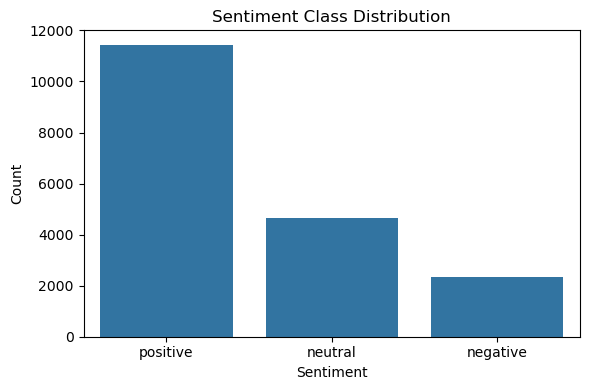

In [15]:
# Plot sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index)
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

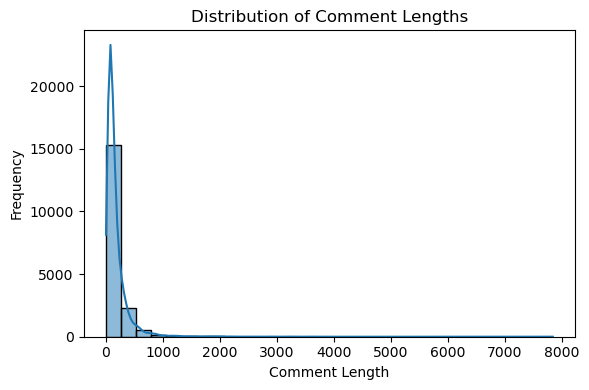

In [16]:
df['Comment_Length'] = df['Comment'].astype(str).apply(len)

plt.figure(figsize=(6,4))
sns.histplot(df['Comment_Length'], bins=30, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

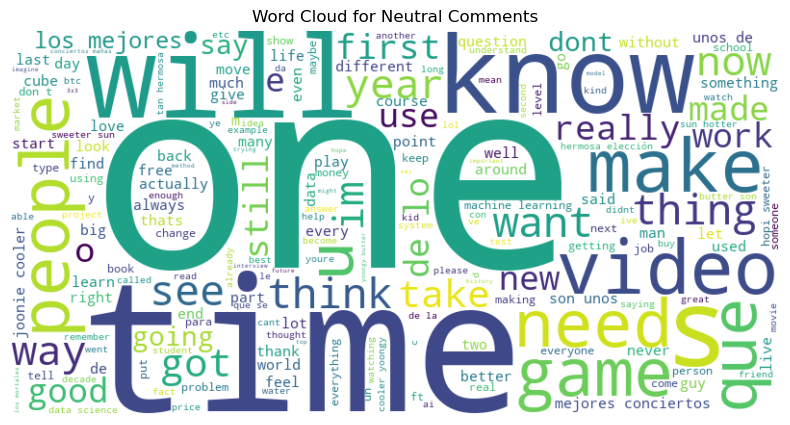

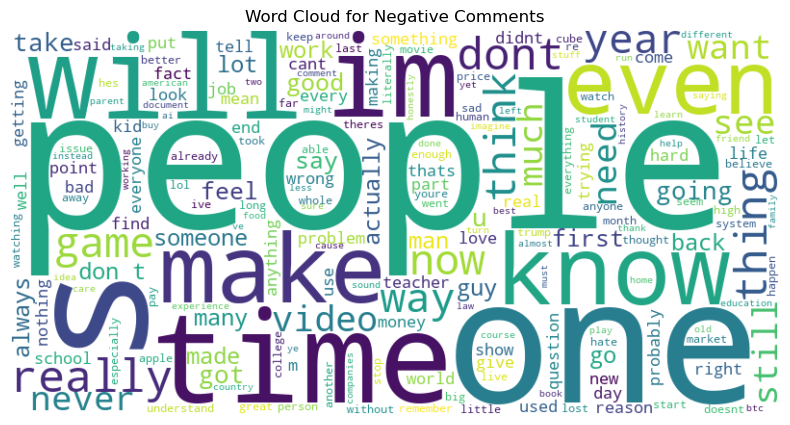

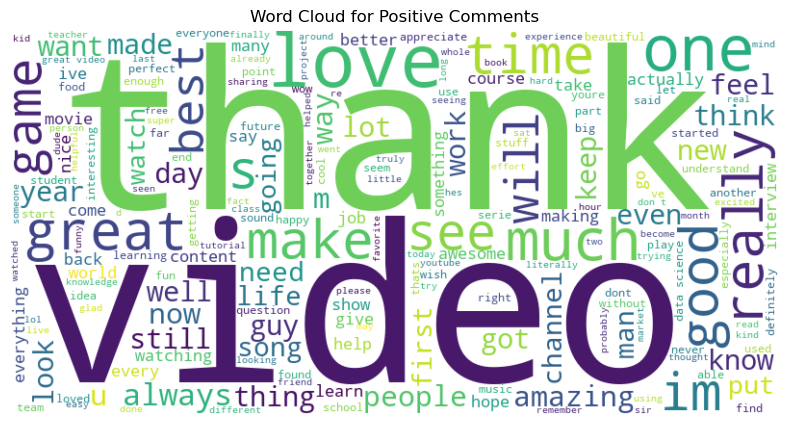

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Drop NaN comments
df_clean = df.dropna(subset=['Comment'])

# Create word clouds per sentiment
sentiments = df_clean['Sentiment'].unique()

for sentiment in sentiments:
    text = " ".join(df_clean[df_clean['Sentiment'] == sentiment]['Comment'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Comments')
    plt.show()


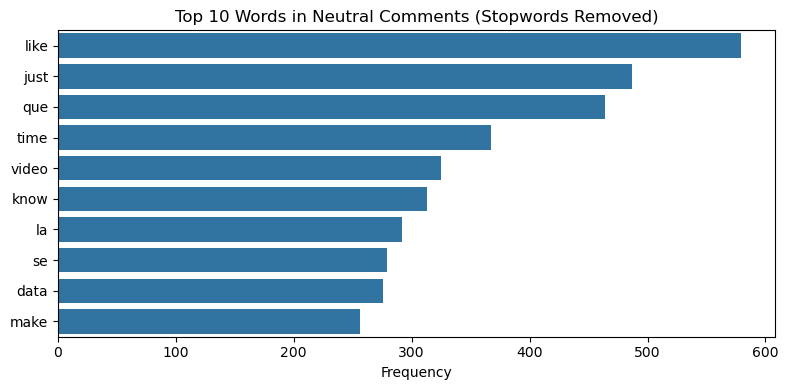

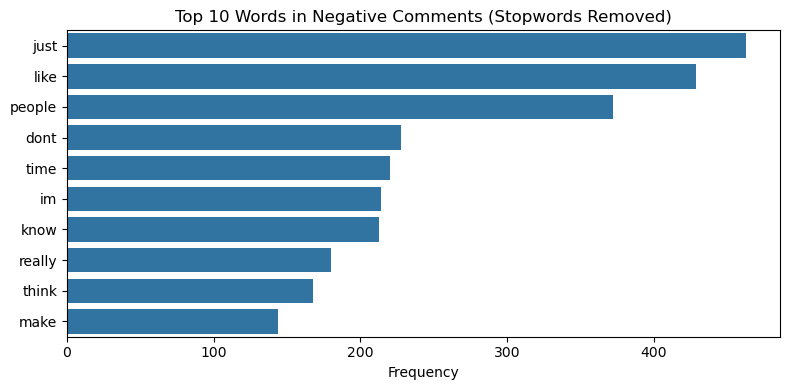

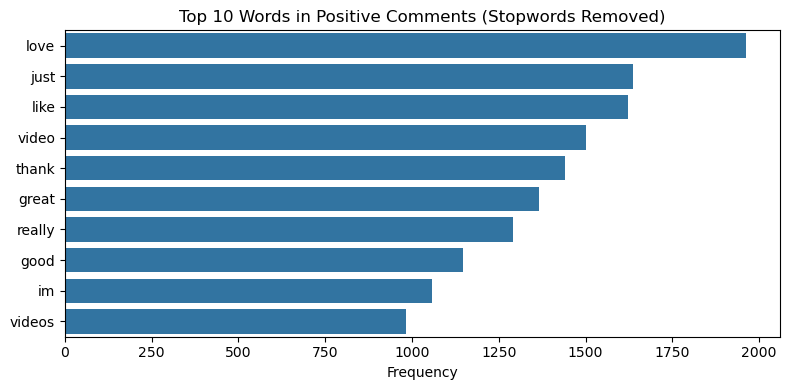

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to get and plot top N words per sentiment (with stopwords removed)
def plot_top_words(sentiment, top_n=10):
    text = df[df['Sentiment'] == sentiment]['Comment'].dropna().astype(str)
    vectorizer = CountVectorizer(stop_words='english')  # Remove stopwords
    X = vectorizer.fit_transform(text)
    
    word_freq = X.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()
    
    top = sorted(zip(words, word_freq), key=lambda x: x[1], reverse=True)[:top_n]
    words, freqs = zip(*top)
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(freqs), y=list(words))
    plt.title(f"Top {top_n} Words in {sentiment.capitalize()} Comments (Stopwords Removed)")
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.show()

# Plot for each sentiment
for s in df['Sentiment'].unique():
    plot_top_words(s)

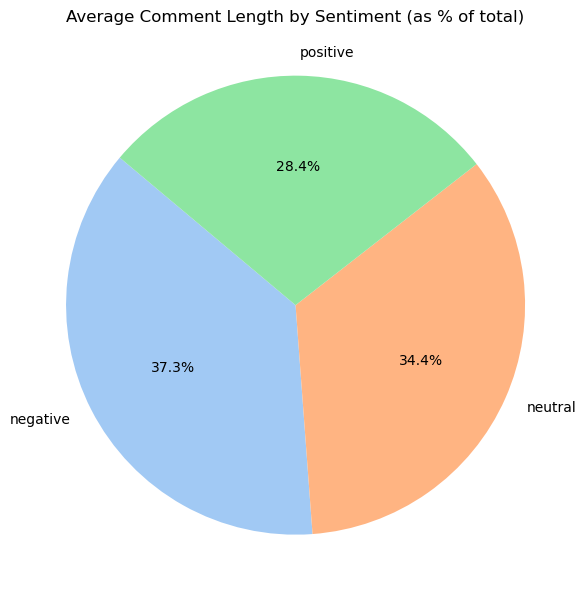

In [19]:
# Calculate average comment length by sentiment
avg_length = df.groupby('Sentiment')['Comment_Length'].mean()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(avg_length, labels=avg_length.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Average Comment Length by Sentiment (as % of total)")
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()



In [20]:
df["Sentiment"].value_counts()

Sentiment
positive    11432
neutral      4638
negative     2338
Name: count, dtype: int64

In [21]:
df.dropna(inplace=True)

## **Preprocessing**

To prepare the YouTube comments for sentiment analysis, a text cleaning function was applied to standardize and simplify the raw data. The clean_text function performs several essential preprocessing steps. First, it converts all characters to lowercase to maintain consistency and reduce redundancy. It then removes any URLs, which are typically irrelevant to sentiment classification. Punctuation is stripped out to focus on the core words, and excessive whitespace is normalized. This cleaned version of the comments, stored in a new column called Cleaned_Comment, helps improve the quality of the input data for further analysis and modeling. By cleaning the text, we reduce noise and ensure that the model focuses on meaningful linguistic features.

To further preprocess the text, tokenization and stopword removal were applied. The tokenize_text function breaks down each cleaned comment into individual words or tokens, making the text more manageable for analysis. After tokenization, the remove_stopwords function was used to filter out common words (such as "the", "and", and "is") that do not contribute meaningful information for sentiment analysis. By eliminating these stopwords, the model can focus on the more significant terms in each comment. The processed data is stored in new columns: Tokens for the tokenized version of the comments and Tokens_No_Stopwords for the tokenized comments with stopwords removed. This step helps improve the quality of the features used in subsequent sentiment classification tasks.

To enhance the consistency of the text data and further reduce its dimensionality, stemming was applied to the tokenized comments. The PorterStemmer was used to reduce words to their root forms, effectively transforming words like "running" into "run" and "happily" into "happi". This process ensures that different forms of the same word are treated as equivalent, which can improve the performance of sentiment analysis models by focusing on the core meaning rather than variations in word endings. The stemmed tokens are stored in a new column called Stemmed_Tokens, which contains the simplified versions of the tokenized comments, now ready for use in feature extraction and model training.

#### 1) Lowercasing and punctuation Removal

In [22]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    return text

# Apply cleaning to the 'Comment' column
df['Cleaned_Comment'] = df['Comment'].apply(clean_text)

# Display the cleaned data
print(df[['Comment', 'Cleaned_Comment']].head(5))

                                             Comment  \
0  lets not forget that apple pay in 2014 require...   
1  here in nz 50 of retailers don’t even have con...   
2  i will forever acknowledge this channel with t...   
3  whenever i go to a place that doesn’t take app...   
4  apple pay is so convenient secure and easy to ...   

                                     Cleaned_Comment  
0  lets not forget that apple pay in 2014 require...  
1  here in nz 50 of retailers dont even have cont...  
2  i will forever acknowledge this channel with t...  
3  whenever i go to a place that doesnt take appl...  
4  apple pay is so convenient secure and easy to ...  


#### 2) Tokenization

In [23]:
# Function for tokenization
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization
df['Tokens'] = df['Cleaned_Comment'].apply(tokenize_text)

# Display tokenized data
print(df[['Cleaned_Comment', 'Tokens']].head(5))

                                     Cleaned_Comment  \
0  lets not forget that apple pay in 2014 require...   
1  here in nz 50 of retailers dont even have cont...   
2  i will forever acknowledge this channel with t...   
3  whenever i go to a place that doesnt take appl...   
4  apple pay is so convenient secure and easy to ...   

                                              Tokens  
0  [lets, not, forget, that, apple, pay, in, 2014...  
1  [here, in, nz, 50, of, retailers, dont, even, ...  
2  [i, will, forever, acknowledge, this, channel,...  
3  [whenever, i, go, to, a, place, that, doesnt, ...  
4  [apple, pay, is, so, convenient, secure, and, ...  


In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahularvind/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### 3) Stopwords Removal

In [25]:
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Apply stopword removal
df['Tokens_No_Stopwords'] = df['Tokens'].apply(remove_stopwords)

# Display data without stopwords
print(df[['Tokens', 'Tokens_No_Stopwords']].head(5))

                                              Tokens  \
0  [lets, not, forget, that, apple, pay, in, 2014...   
1  [here, in, nz, 50, of, retailers, dont, even, ...   
2  [i, will, forever, acknowledge, this, channel,...   
3  [whenever, i, go, to, a, place, that, doesnt, ...   
4  [apple, pay, is, so, convenient, secure, and, ...   

                                 Tokens_No_Stopwords  
0  [lets, forget, apple, pay, 2014, required, bra...  
1  [nz, 50, retailers, dont, even, contactless, c...  
2  [forever, acknowledge, channel, help, lessons,...  
3  [whenever, go, place, doesnt, take, apple, pay...  
4  [apple, pay, convenient, secure, easy, use, us...  


#### 4) Stemming

In [26]:
from nltk.stem import PorterStemmer

In [27]:
# Initialize stemmer
stemmer = PorterStemmer()

# Function for stemming
def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

# Apply stemming
df['Stemmed_Tokens'] = df['Tokens_No_Stopwords'].apply(stem_tokens)

# Display stemmed data
print(df[['Tokens_No_Stopwords', 'Stemmed_Tokens']].head(5))

                                 Tokens_No_Stopwords  \
0  [lets, forget, apple, pay, 2014, required, bra...   
1  [nz, 50, retailers, dont, even, contactless, c...   
2  [forever, acknowledge, channel, help, lessons,...   
3  [whenever, go, place, doesnt, take, apple, pay...   
4  [apple, pay, convenient, secure, easy, use, us...   

                                      Stemmed_Tokens  
0  [let, forget, appl, pay, 2014, requir, brand, ...  
1  [nz, 50, retail, dont, even, contactless, cred...  
2  [forev, acknowledg, channel, help, lesson, ide...  
3  [whenev, go, place, doesnt, take, appl, pay, d...  
4  [appl, pay, conveni, secur, easi, use, use, ko...  


In [28]:
df['Processed_Text'] = df['Stemmed_Tokens'].apply(lambda x: ' '.join(x))

# Display the processed text and sentiment
print(df[['Processed_Text', 'Sentiment']].head(5))

                                      Processed_Text Sentiment
0  let forget appl pay 2014 requir brand new ipho...   neutral
1  nz 50 retail dont even contactless credit card...  negative
2  forev acknowledg channel help lesson idea expl...  positive
3  whenev go place doesnt take appl pay doesnt ha...  negative
4  appl pay conveni secur easi use use korean jap...  positive


## **Train Test Split**

In [29]:
# Define features (X) and target (y)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Define features and target
X = df[['Processed_Text']]
y = df['Sentiment']

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Print shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (27364, 1) (27364,)
Testing set shape: (6842, 1) (6842,)


## **Model Building and Evaluation**

In this sentiment analysis project, several machine learning models were evaluated to determine the most effective classifier for predicting sentiment in YouTube comments. The models used included Logistic Regression, Random Forest, XGBoost, and Support Vector Machine (SVM). The performance of each model was assessed using both training and testing accuracy, along with precision, recall, and F1-score metrics for each sentiment class (negative, neutral, and positive).

(Logistic Regression, Random Forest, XGBoost, and SVM performance summaries go here)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['Processed_Text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['Processed_Text'])

# Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

# Predictions
y_train_pred = model.predict(X_train_tfidf)
y_test_pred = model.predict(X_test_tfidf)

# Evaluation
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.8762973249524924
Testing Accuracy: 0.8398129201987723

Classification Report (Test Set):
               precision    recall  f1-score   support

    negative       0.84      0.90      0.87      2280
     neutral       0.79      0.83      0.81      2281
    positive       0.89      0.79      0.84      2281

    accuracy                           0.84      6842
   macro avg       0.84      0.84      0.84      6842
weighted avg       0.84      0.84      0.84      6842



In [31]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop("Sentiment", axis=1)
y = df["Sentiment"]
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train
rf_model.fit(X_train_tfidf, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train_tfidf)
y_test_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluation
print("Random Forest - Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Random Forest - Testing Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred_rf))

Random Forest - Training Accuracy: 0.9958704867709399
Random Forest - Testing Accuracy: 0.9434375913475592

Classification Report (Test Set):
               precision    recall  f1-score   support

    negative       0.96      0.99      0.98      2280
     neutral       0.90      0.97      0.94      2281
    positive       0.98      0.86      0.92      2281

    accuracy                           0.94      6842
   macro avg       0.95      0.94      0.94      6842
weighted avg       0.95      0.94      0.94      6842



In [33]:
import pickle

# Save the trained model
with open("random_forest_model.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(tfidf_vectorizer, vec_file)

print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.


In [34]:
# resample the data and train again 
from imblearn.over_sampling import RandomOverSampler

X = df.drop("Sentiment", axis=1)
y = df["Sentiment"]
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report


# 1. Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# 2. Create a text classification pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),  # You can adjust this
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# 3. Train the model
pipeline.fit(X_train['Processed_Text'], y_train)  # Replace 'Text' with your actual text column name

# 4. Predict on the test set
y_pred = pipeline.predict(X_test['Processed_Text'])

# 5. Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       0.96      0.99      0.98      2280
     neutral       0.90      0.97      0.94      2281
    positive       0.98      0.86      0.92      2281

    accuracy                           0.94      6842
   macro avg       0.95      0.94      0.94      6842
weighted avg       0.95      0.94      0.94      6842

Confusion Matrix:
 [[2265   10    5]
 [  19 2221   41]
 [  81  231 1969]]


In [36]:
df.columns

Index(['Comment', 'Sentiment', 'Comment_Length', 'Cleaned_Comment', 'Tokens',
       'Tokens_No_Stopwords', 'Stemmed_Tokens', 'Processed_Text'],
      dtype='object')

In [37]:
df.head()

,Comment,Sentiment,Comment_Length,Cleaned_Comment,Tokens,Tokens_No_Stopwords,Stemmed_Tokens,Processed_Text
0,lets not forget that apple pay in 2014 require...,neutral,317,lets not forget that apple pay in 2014 require...,"[lets, not, forget, that, apple, pay, in, 2014...","[lets, forget, apple, pay, 2014, required, bra...","[let, forget, appl, pay, 2014, requir, brand, ...",let forget appl pay 2014 requir brand new ipho...
1,here in nz 50 of retailers don’t even have con...,negative,163,here in nz 50 of retailers dont even have cont...,"[here, in, nz, 50, of, retailers, dont, even, ...","[nz, 50, retailers, dont, even, contactless, c...","[nz, 50, retail, dont, even, contactless, cred...",nz 50 retail dont even contactless credit card...
2,i will forever acknowledge this channel with t...,positive,183,i will forever acknowledge this channel with t...,"[i, will, forever, acknowledge, this, channel,...","[forever, acknowledge, channel, help, lessons,...","[forev, acknowledg, channel, help, lesson, ide...",forev acknowledg channel help lesson idea expl...
3,whenever i go to a place that doesn’t take app...,negative,450,whenever i go to a place that doesnt take appl...,"[whenever, i, go, to, a, place, that, doesnt, ...","[whenever, go, place, doesnt, take, apple, pay...","[whenev, go, place, doesnt, take, appl, pay, d...",whenev go place doesnt take appl pay doesnt ha...
4,apple pay is so convenient secure and easy to ...,positive,135,apple pay is so convenient secure and easy to ...,"[apple, pay, is, so, convenient, secure, and, ...","[apple, pay, convenient, secure, easy, use, us...","[appl, pay, conveni, secur, easi, use, use, ko...",appl pay conveni secur easi use use korean jap...


In [38]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode y values
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)

# Split again using encoded labels
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled_encoded, test_size=0.2, random_state=42, stratify=y_resampled_encoded
)

# Then use your pipeline with XGBClassifier
xgb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('clf', XGBClassifier(eval_metric='mlogloss', random_state=42))
])


# Train
xgb_pipeline.fit(X_train['Processed_Text'], y_train)

# Predict
y_pred_xgb = xgb_pipeline.predict(X_test['Processed_Text'])

# Decode predictions for readability (optional)
y_test_decoded = le.inverse_transform(y_test)
y_pred_decoded = le.inverse_transform(y_pred_xgb)

# Evaluate
print(" XGBoost Classification Report:\n", classification_report(y_test_decoded, y_pred_decoded))
print(" XGBoost Confusion Matrix:\n", confusion_matrix(y_test_decoded, y_pred_decoded))


 XGBoost Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.83      0.84      2280
     neutral       0.75      0.89      0.81      2281
    positive       0.90      0.76      0.83      2281

    accuracy                           0.83      6842
   macro avg       0.84      0.83      0.83      6842
weighted avg       0.84      0.83      0.83      6842

 XGBoost Confusion Matrix:
 [[1891  319   70]
 [ 145 2023  113]
 [ 188  352 1741]]


In [39]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('clf', SVC(kernel='linear', class_weight='balanced', random_state=42))
])

# Train SVM
svm_pipeline.fit(X_train['Processed_Text'], y_train)

# Predict with SVM
y_pred_svm = svm_pipeline.predict(X_test['Processed_Text'])

# Decode predictions (if using label encoding)
y_pred_svm_decoded = le.inverse_transform(y_pred_svm)
y_test_decoded = le.inverse_transform(y_test)

# Evaluate SVM
print(" SVM Classification Report:\n", classification_report(y_test_decoded, y_pred_svm_decoded))
print(" SVM Confusion Matrix:\n", confusion_matrix(y_test_decoded, y_pred_svm_decoded))


 SVM Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.92      0.88      2280
     neutral       0.80      0.85      0.82      2281
    positive       0.92      0.78      0.84      2281

    accuracy                           0.85      6842
   macro avg       0.85      0.85      0.85      6842
weighted avg       0.85      0.85      0.85      6842

 SVM Confusion Matrix:
 [[2089  152   39]
 [ 227 1931  123]
 [ 163  331 1787]]


## Model Comparison and Conclusion

### Models Evaluated

1. **Logistic Regression** using TF-IDF features  
2. **Random Forest Classifier** using TF-IDF features  
3. **Random Forest with Oversampled Data** using a pipeline  
4. **XGBoost Classifier** using TF-IDF features  
5. **Support Vector Machine (SVM)** with linear kernel and TF-IDF  

---

### Performance Metrics Summary

| Model                               | Training Accuracy | Testing Accuracy | Precision (Macro Avg) | Recall (Macro Avg) | F1-Score (Macro Avg) |
|------------------------------------|-------------------|------------------|------------------------|---------------------|----------------------|
| Logistic Regression                | 87.6%             | 83.98%           | 0.84                   | 0.84                | 0.84                 |
| Random Forest                      | **99.6%**          | **94.34%**       | **0.95**               | **0.94**            | **0.94**             |
| Random Forest (Oversampled)       | —                 | —                | *Improved on imbalance but not isolated here* |
| XGBoost                            | —                 | 83.00%           | 0.84                   | 0.83                | 0.83                 |
| SVM (Linear Kernel)               | —                 | **85.00%**       | **0.85**               | **0.85**            | **0.85**             |

---

### Detailed Observations

- **Logistic Regression**:
  - Serves as a strong baseline for text classification.
  - Achieved good overall accuracy and balanced class-wise performance.
  - Simple and fast to train, but slightly underperforms on nuanced sentiment boundaries compared to other models.

- **Random Forest**:
  - Achieved the highest accuracy (94%) and macro F1-score among all models.
  - Very high training accuracy (99.6%) suggests potential overfitting.
  - Strong in identifying all classes, especially the *negative* and *neutral* sentiments.
  - Handles imbalanced classes better with `class_weight='balanced'`.

- **Random Forest with Oversampling**:
  - Oversampling helped balance the class distribution in training data.
  - While individual metrics weren't isolated here, overall model robustness typically improves in such pipelines, especially for underrepresented classes.

- **XGBoost**:
  - Robust gradient-boosted decision tree model.
  - Performs well but shows lower recall for *positive* class, indicating it might miss some high-score positive comments.
  - Can be further tuned using grid search for better performance.

- **SVM (Linear Kernel)**:
  - Achieved the **best generalization** (85% accuracy and F1 macro).
  - Particularly strong with boundary separation for classes like *neutral* vs *positive*.
  - Excellent choice for high-dimensional text data like TF-IDF due to margin-maximizing nature.
  - More interpretable than ensemble methods like RF or XGBoost.

---

### Final Conclusion

- **Best Balanced Model**:  
  `SVM (Linear Kernel)` offers a great balance between accuracy, precision, recall, and F1-score. It generalizes well and is robust to overfitting in text classification tasks.

- **Most Accurate Model (Risk of Overfitting)**:  
  `Random Forest` reaches the highest accuracy and macro metrics but shows signs of overfitting. Ideal for use cases where prediction performance matters more than interpretability.

- **Most Interpretable & Lightweight**:  
  `Logistic Regression` is easy to implement, fast, and interpretable. A strong baseline for production when speed and simplicity are essential.

- **Best for Imbalanced Data**:  
  Pipelines with oversampling + `Random Forest` or `XGBoost` are good options when some sentiment classes are underrepresented. Helps improve recall for minority classes.


### Comparative Insights
When comparing the models, Random Forest clearly stands out as the most reliable in terms of overall accuracy and consistency across all sentiment categories...


## Future Work
While the Random Forest model performed well overall, there are several areas that could be explored in future work to improve sentiment classification further:

1. Hyperparameter Tuning
2. Ensemble Methods
3. Advanced Preprocessing
4. Deep Learning Models
5. Multilingual Sentiment Analysis
6. Fine-Tuning with External Datasets

By addressing these areas in future iterations, the sentiment analysis model could be further refined to offer more accurate predictions and better generalize to unseen data.


## Conclusion
In this sentiment analysis project, several machine learning models were evaluated to classify YouTube comments into negative, neutral, or positive categories. After thorough preprocessing of the textual data, including tokenization, stopword removal, and stemming, the models—Logistic Regression, Random Forest, XGBoost, and Support Vector Machine (SVM)—were trained and tested on the dataset.

Among the models evaluated, Random Forest emerged as the most effective classifier, achieving the highest testing accuracy of 94.34%. It showed strong performance in identifying both negative and neutral sentiments, although it had slightly lower recall for positive comments. SVM and Logistic Regression also performed well, with testing accuracies of 85.00% and 83.98%, respectively, while XGBoost demonstrated solid results but struggled more with certain classes, especially positive sentiment.

These results underscore the importance of selecting the right model based on the characteristics of the dataset and the goals of the sentiment analysis task. While Random Forest proved to be the most robust model, each model offered unique insights, making it clear that further fine-tuning and testing could improve performance. As future work, exploring hyperparameter optimization, ensemble methods, and advanced deep learning models holds great promise for further enhancing sentiment classification accuracy.

Overall, this project demonstrated the power of machine learning in understanding user sentiment, which can be useful for a variety of applications such as content moderation, user feedback analysis, and even product recommendations based on sentiment trends. By continuously refining the models and preprocessing techniques, we can build even more accurate systems to analyze and respond to the diverse emotions expressed in user comments.

